# Exercise 3: Part A

This exercise relates to the *ISLR2_Weekly* data set which can be found in `../datasets/ISLR2_Weekly.csv` file as a _csv_ file.

It contains data about the weekly percentage returns for the S&P 500 stock index between 1990 and 2010.

The variables are:

* `Year`: The year that the observation was recorded.
* `Lag1`: Percentage return for previous week.
* `Lag2`: Percentage return for 2 weeks previous.
* `Lag3`: Percentage return for 3 weeks previous.
* `Lag4`: Percentage return for 4 weeks previous.
* `Lag5`: Percentage return for 5 weeks previous.
* `Volume`: Volume of shares traded (average number of daily shares traded in billions)
* `Today`: Percentage return for this week.
* `Direction`: A factor with levels `Down` and `Up` indicating whether the market had a positive or negative return on a given week.

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.base import BaseEstimator
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
def task1_get_data():
    df = pd.read_csv("../data/ISLR2_Weekly.csv")
    direction_dict = {"Up": 1, "Down": 0}
    df["Direction"] = df["Direction"].apply(lambda x: direction_dict[x])
    return df

task1_get_data()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,1
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,1
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,1
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,1


## Task 1: Investigate the data

Produce some numerical and graphical summaries of the “Weekly” data that you think could be useful. Do there appear to be any patterns ?

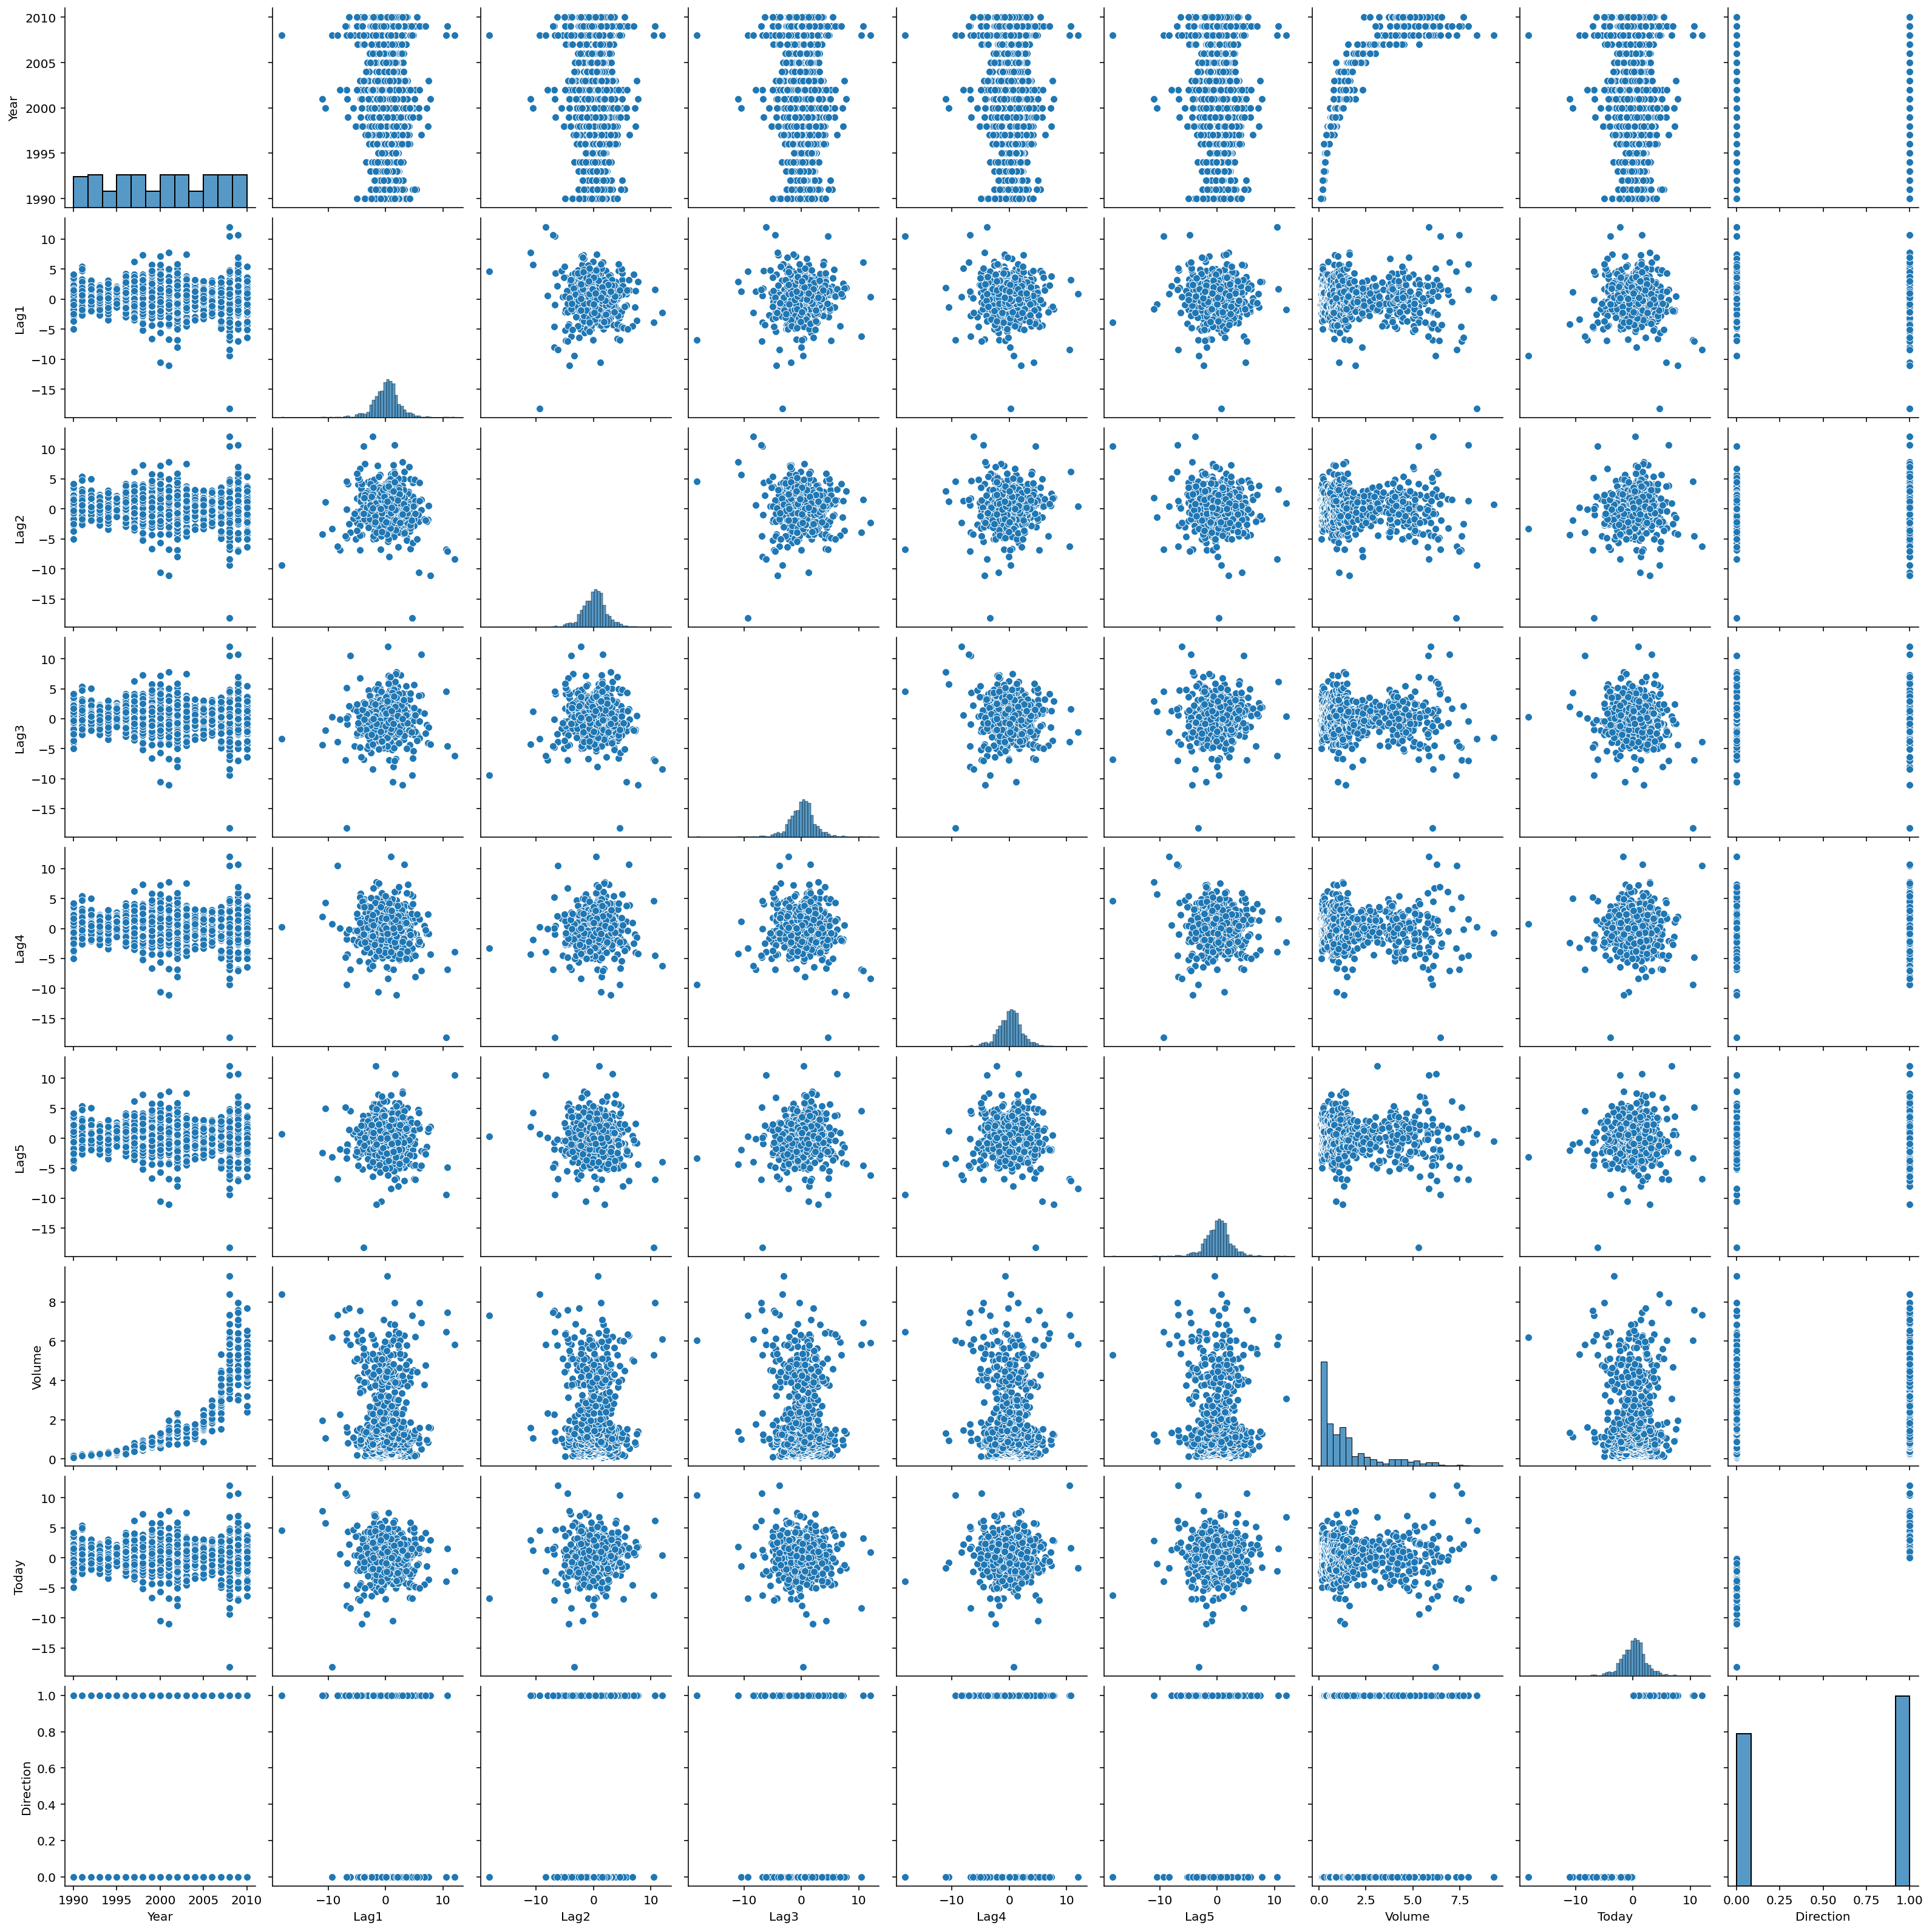

In [4]:
data = task1_get_data()

sns.pairplot(data)

# We see a correlation between Volume and Year - the Volume of trading increased over the years

In [5]:
data.dtypes

Year           int64
Lag1         float64
Lag2         float64
Lag3         float64
Lag4         float64
Lag5         float64
Volume       float64
Today        float64
Direction      int64
dtype: object

## Task 2: Logistic Regression

Use the full data set to perform a logistic regression with “Direction” as the response and the five lag variables plus “Volume” as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant ? If so, which ones ?


In [7]:
Xtrain = sm.add_constant(data[["Lag1", "Lag2","Lag3","Lag4","Lag5","Volume"]])
ytrain = data[["Direction"]]

# building the model and fitting the data
log_reg = sm.Logit(ytrain, Xtrain).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Tue, 16 Nov 2021   Pseudo R-squ.:                0.006580
Time:                        13:48:20   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

## Task 3: Confusion Matrix

Compute the confusion matrix and overall fraction of correct predictions, for the model from task 2.

- i. Do this using `statsmodels`.
- ii. Do this using `scikit-learn`.

In [8]:
#Confusion matrix with statsmodels - no train/test split done here. Is it necessary at this point?
log_reg.pred_table()

array([[ 54., 430.],
       [ 48., 557.]])

In [10]:
#With scikit-learn
from sklearn.metrics import confusion_matrix
yhat = log_reg.predict(Xtrain)
prediction = list(map(round, yhat))

cm = confusion_matrix(ytrain, prediction)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[ 54 430]
 [ 48 557]]


## Task 4: Logistic Regression and Accuracy

Now fit the logistic regression model using a training data period from 1990 to 2008, with “Lag2” as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 to 2010).

HINT: Solve this using `scikit-learn`, it makes the following tasks easier / faster.

<h5>Check solution for accuracy</h5>

In [11]:
from sklearn.metrics import confusion_matrix

x_trainData = data[data['Year'] < 2009]
x_testData = data[data['Year'] >= 2009]

x_train = x_trainData[["Lag2"]]
x_test = x_testData[["Lag2"]]

y_trainData = data[data['Year'] < 2009]
y_testData = data[data['Year'] >= 2009]

y_train = x_trainData[["Direction"]]
y_test = x_testData[["Direction"]]

clf = LogisticRegression().fit(X=x_train,y=y_train.values.ravel())

yhat = clf.predict(x_test)
prediction = list(map(round, yhat))

confusion_matrix(y_test, prediction)

confusion_matrix(y_test, prediction)

array([[ 9, 34],
       [ 5, 56]])

In [35]:
def logregTest(classifier):
    clf = classifier.fit(X=x_train,y=y_train.values.ravel())
    yhat = clf.predict(x_test)
    prediction = list(map(round, yhat))
    accuracy = accuracy_score(x_test,prediction)
    print(accuracy)
    return confusion_matrix(y_test, prediction)

## Task 5: LDA

Repeat task 4, but this time use LDA (Linear Discriminant Analysis).

In [36]:
print(logregTest(LinearDiscriminantAnalysis()))

NameError: name 'model' is not defined

## Task 6: QDA

Repeat task 4, but this time use QDA.

In [15]:
print(logregTest(QuadraticDiscriminantAnalysis()))

[[ 0 43]
 [ 0 61]]


## Task 7: kNN

Repeat task 4, but this time use kNN with K=1.

In [16]:
print(logregTest(KNeighborsClassifier()))

[[16 27]
 [21 40]]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
